<h1 align="center">Web Mining Lab Assignment-5
</h1>
                                                                                                                                        <h3 align="right">Aryan Vigyat</h3>
                                                                                                            <h3 align="right"> 20BCE1452</h3>

HITS Algorithm

In [1]:
!pip install networkx --upgrade
import networkx as nx


     ---------------------------------------- 2.1/2.1 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

adj = [[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
      ]

G = nx.DiGraph()
for i in range(len(adj)):
    for j in range(len(adj[i])):
        if adj[i][j] != 0:
            G.add_edge(i, j)
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K'}
for node in G.nodes:
    G.add_node(node, label=labels[node])


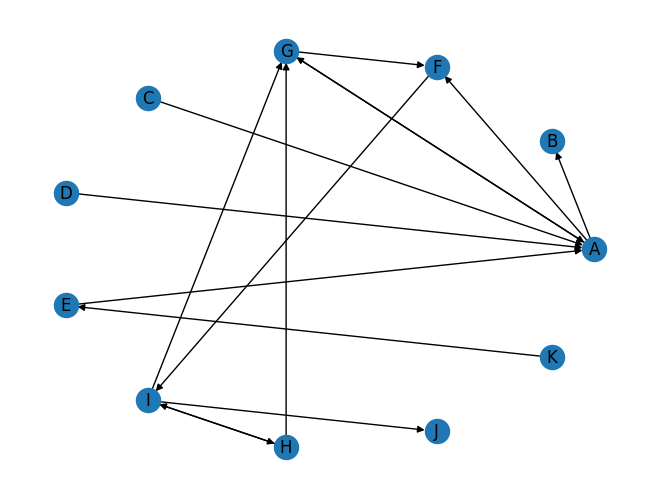

In [7]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: data["label"] for node, data in G.nodes(data=True)})
plt.show()


Using Custom Algorithm


In [8]:
num_vertices_1=11
num_iterations = 4
outbound_vertices_1 = [[] for _ in range(num_vertices_1)]
for i in range(num_vertices_1) :
 for j in range(num_vertices_1) :
    if adj[i][j] == 1 :
        outbound_vertices_1[i].append(j)
outbound_vertices_1

[[1, 5, 6], [], [0], [0], [0], [8], [0, 5], [6, 8], [6, 7, 9], [], [4]]

In [9]:
# Store the in-bound vertices for each vertex
inbound_vertices_1 = [[] for _ in range(num_vertices_1)]
for i in range(num_vertices_1) :
    for j in range(num_vertices_1) :
        if adj[j][i] == 1 :
            inbound_vertices_1[i].append(j)
inbound_vertices_1


[[2, 3, 4, 6], [0], [], [], [10], [0, 6], [0, 7, 8], [8], [5, 7], [8], []]

In [10]:
# We will initialize the `authority` and the `hub` scores.
authority_scores_1 = [1] * num_vertices_1
hub_scores_1 = [1] * num_vertices_1

In [11]:
# Initialize the authority and hub scores
authority_scores = dict.fromkeys(G.nodes(), 1.0)
hub_scores = dict.fromkeys(G.nodes(), 1.0)

# Iterate for the specified number of iterations
for i in range(num_iterations):
    # Store the old authority and hub scores
    old_authority_scores = authority_scores.copy()
    old_hub_scores = hub_scores.copy()

    # Update the authority and hub scores
    for node in G.nodes():
        inbound_vertices = G.predecessors(node)
        authority_scores[node] = sum([old_hub_scores[v] for v in inbound_vertices])
        outbound_vertices = G.successors(node)
        hub_scores[node] = sum([old_authority_scores[v] for v in outbound_vertices])

    # Normalize the authority and hub scores
    authority_norm = sum(authority_scores.values())
    hub_norm = sum(hub_scores.values())
    for node in G.nodes():
        authority_scores[node] /= authority_norm
        hub_scores[node] /= hub_norm
for node, authority_score in authority_scores.items():
    print(labels[node], ":", authority_score)


A : 0.16556291390728475
B : 0.10596026490066224
F : 0.17218543046357615
G : 0.271523178807947
C : 0.0
D : 0.0
E : 0.00662251655629139
I : 0.09271523178807947
H : 0.09271523178807949
J : 0.09271523178807949
K : 0.0


In [12]:
print("The Hub scores of the nodes using Networkx library : ")
for node, hub_score in hub_scores.items():
    print(labels[node], ":", hub_score)

The Hub scores of the nodes using Networkx library : 
A : 0.19428571428571428
B : 0.0
F : 0.04
G : 0.17142857142857143
C : 0.10285714285714284
D : 0.10285714285714284
E : 0.10285714285714284
I : 0.14857142857142858
H : 0.13142857142857145
J : 0.0
K : 0.005714285714285714


Using Inbuilts HITS Algorithm

In [13]:
hub_scores_networkx, authority_scores_networkx = nx.hits(G,max_iter=4, normalized = True)

In [14]:
# Print the Authority scores
print("The Authority scores of the nodes using Networkx library : ")
for k, v in authority_scores_networkx.items() :
 print(labels[k], " : ", v)

The Authority scores of the nodes using Networkx library : 
A  :  0.17083057489162345
B  :  0.11135119658826395
F  :  0.18087471475229738
G  :  0.27107706702529233
C  :  0.0
D  :  0.0
E  :  2.0432377644483274e-17
I  :  0.08862214891417429
H  :  0.08862214891417426
J  :  0.08862214891417426
K  :  0.0


In [15]:
# Print the Hub scores
print("The Hub scores of the nodes using Networkx library : ")
for k, v in hub_scores_networkx.items() :
 print(labels[k], " : ", v)


The Hub scores of the nodes using Networkx library : 
A  :  0.24237021803296221
B  :  0.0
F  :  0.03813111305960052
G  :  0.15132688980561315
C  :  0.07350261808182357
D  :  0.07350261808182357
E  :  0.07350261808182357
I  :  0.19289751895797694
H  :  0.15476640589837648
J  :  0.0
K  :  8.791360981246017e-18


Comparing the Authority and Hub Scores for both the implementations they are very similar and are in the accepted criteria for error percentage so the results are verified 

Page Rank

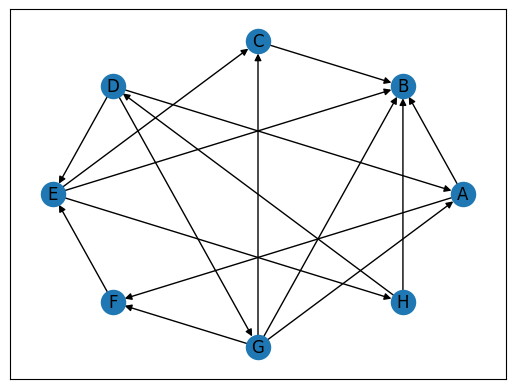

In [26]:
G1 = nx.DiGraph()
num_vertices=8
vertices_name1 = ['A', 'B', 'C', 'D','E','F','G','H']
G1.add_nodes_from(vertices_name1)
G1.add_edges_from([('A','B'),('A','F'),('C','B'),('D','A'),('D','E'),('D','G'),('E','B'),('E','C'),('E','H'),('F','E'),('G','F'), ('G','A'),('G','B'),('G','C'),('H','D'), ('H', 'B')])

nx.draw_networkx(G1, pos=nx.circular_layout(G1), arrows=True, with_labels=True)
plt.show()

Using Inbuilt Page Rank

In [49]:
pagerank=nx.pagerank(G1,alpha=0.85,max_iter=100)
print("The page ranks are as follows=\n")
pagerank

The page ranks are as follows=



{'A': 0.08941499371129827,
 'B': 0.28120563198030324,
 'C': 0.10983011816321761,
 'D': 0.08864644387947536,
 'E': 0.1606990303925196,
 'F': 0.10229957241772619,
 'G': 0.07374454250177016,
 'H': 0.09415966695368949}

In [46]:
# # Sort the pages by their ranks
# page_ranks_networkx=dict(sorted(page_ranks_networkx.items(),key=lambda item:item[1],reverse=True))
# page_ranks_networkx

{'B': 0.28120563198030324,
 'E': 0.1606990303925196,
 'C': 0.10983011816321761,
 'F': 0.10229957241772619,
 'H': 0.09415966695368949,
 'A': 0.08941499371129827,
 'D': 0.08864644387947536,
 'G': 0.07374454250177016}

Using Random Walk Algorithm

In [50]:
out_bound_vertices_count=[0 for _ in range(num_vertices)]
A=nx.adjacency_matrix(G1,nodelist=vertices_name1)
adj=A.todense()
for i in range(num_vertices):
    out_bound_vertices_count[i]=sum(adj[i])
out_bound_vertices_count

[2, 0, 1, 3, 3, 1, 4, 2]

In [51]:
in_bound_vertices_list={}
for i in range(num_vertices):
    in_bound_vertices_list[i]=[]
    for j in range(num_vertices):
        if adj[j][i]==1:
            in_bound_vertices_list[i].append(j)
in_bound_vertices_list

{0: [3, 6],
 1: [0, 2, 4, 6, 7],
 2: [4, 6],
 3: [7],
 4: [3, 5],
 5: [0, 6],
 6: [3],
 7: [4]}

In [52]:
def pageRank(graph, vertices_names, in_bound_vertices_list, out_bound_vertices_count, tolerance=1.0e-6, max_iterations=100) :
  # Number of vertices
  num_vertices = len(vertices_names)
  page_rank_manual={}
  page_rank = [(1/num_vertices) for _ in range(num_vertices)]
  epsilon = num_vertices * tolerance
  converged = False
  for i in range(max_iterations) :
    page_rank_old = page_rank[:]
    for j in range(num_vertices) :
      page_rank[j] = 0

      for k in in_bound_vertices_list[j] :
        page_rank[j] += page_rank_old[k] / out_bound_vertices_count[k]
    error = sum([abs(page_rank[j] - page_rank_old[j]) for j in range(num_vertices)])
    if error < epsilon :
      converged = True
      break
    if converged :
      page_rank_manual = {}
    for i, pr in enumerate(page_rank) :
      page_rank_manual[vertices_names[i]] = pr
    return page_rank_manual

In [53]:
page_rank_manual = pageRank(G1,vertices_name1, in_bound_vertices_list, out_bound_vertices_count)
page_rank_manual

{'A': 0.07291666666666666,
 'B': 0.32291666666666663,
 'C': 0.07291666666666666,
 'D': 0.0625,
 'E': 0.16666666666666666,
 'F': 0.09375,
 'G': 0.041666666666666664,
 'H': 0.041666666666666664}

Sort the Values

In [55]:
page_rank_manual=dict(sorted(page_rank_manual.items(),key=lambda item:item[1],reverse=True))
page_rank_manual

{'B': 0.32291666666666663,
 'E': 0.16666666666666666,
 'F': 0.09375,
 'A': 0.07291666666666666,
 'C': 0.07291666666666666,
 'D': 0.0625,
 'G': 0.041666666666666664,
 'H': 0.041666666666666664}